# Python (Agreg 2019-2020)
### 12/09/2019

In [1]:
%pylab qt
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
x = 2.1
epsilon = 1e-6
result = 0
n=1
term = 1
while abs(term)> epsilon:
    result = result + term
    term = term*x/n
    n += 1
print(result)
print(np.exp(x))

8.16616948057891
8.16616991256765


In [3]:
from scipy import constants as cst
cst.c
cst.k
cst.N_A

6.022140857e+23

In [4]:
np.pi

3.141592653589793

In [5]:
N = 1000
x = np.random.rand(N, N)
y = np.random.rand(N, N)
%timeit 1+1

8.07 ns ± 0.0881 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


Text(0.5, 0, '$\\Gamma_0 = \\frac{1}{\\kappa}$')

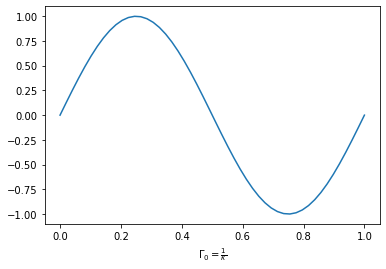

In [51]:
x = np.linspace(0,1)
y = np.sin(2*np.pi*x)
plt.plot(x,y)
plt.plot(x,y)

plt.xlabel(r"$\Gamma_0 = \frac{1}{\kappa}$")

# Pendule

In [6]:
%pylab qt
%matplotlib inline

from scipy import constants as cst

Populating the interactive namespace from numpy and matplotlib


In [7]:
mass = 100e-3
length = 70e-2

def period_small_angle(length, g=cst.g):
    return 2*np.pi*np.sqrt(length/g)

print(period_small_angle(length))

1.6786824519757624


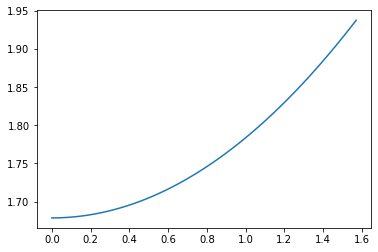

In [8]:
def period_borda_2(theta0, length=length, g=cst.g):
    return period_small_angle(length, g=g)*(1+theta0**2/16)

theta = np.linspace(0, pi/2, 101)
plt.plot(theta, period_borda_2(theta))

In [9]:
file = "C:/Users/remi/Documents/Agreg/Python/pendule.csv"

data = np.loadtxt(file, skiprows=1, delimiter=";", dtype=np.str)
data = np.char.replace(data, ',', '.')
data = np.char.replace(data, 'b', '').astype(np.float64)

theta = data[:,0]*np.pi/180
N = data[:,1]
duration = data[:,2]
period = duration/N

Text(0, 0.5, 'Période (s)')

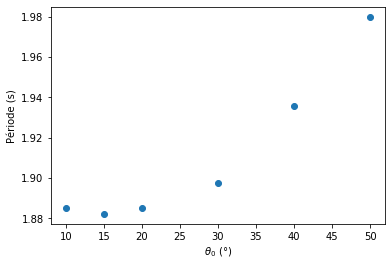

In [10]:
plt.plot(theta*180/np.pi, period, "o")
plt.xlabel(r"$\theta_0\ (\degree)$")
plt.ylabel(r"Période (s)")

Text(0, 0.5, 'Période (s)')

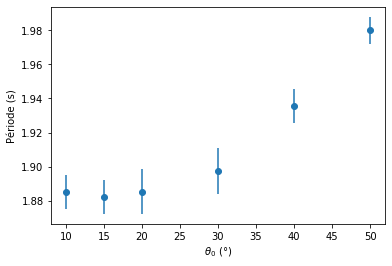

In [11]:
plt.errorbar(theta*180/np.pi, period, yerr=0.2/N, marker="o", linestyle="")
plt.xlabel(r"$\theta_0\ (\degree)$")
plt.ylabel(r"Période (s)")

Text(0, 0.5, 'Période (s)')

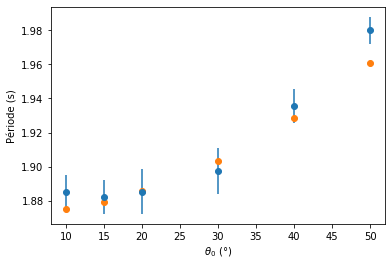

In [12]:
plt.errorbar(theta*180/np.pi, period, yerr=0.2/N, marker="o", linestyle="")
plt.plot(theta*180/np.pi, period_borda_2(theta, length=0.87), "o")
plt.xlabel(r"$\theta_0\ (\degree)$")
plt.ylabel(r"Période (s)")

Paramètres optimisés [1.87145594 0.07244269]
Longueur du pendule = 0.87 m
Incertitude = 0.00 m


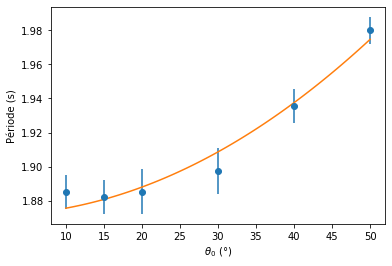

In [20]:
from scipy.optimize import curve_fit

def fit_function(x, T0, beta):
    return T0*(1 + beta*x**2)

popt, _ = curve_fit(fit_function, theta, period)
plt.errorbar(theta*180/np.pi, period, yerr=0.2/N, marker="o", linestyle="")
x = np.linspace(min(theta), max(theta), 101)
plt.plot(x*180/np.pi, fit_function(x, *popt))
plt.xlabel(r"$\theta_0\ (\degree)$")
plt.ylabel(r"Période (s)")
print("Paramètres optimisés", popt)
print("Longueur du pendule = %.2f m"%(cst.g*(popt[0]/2/np.pi)**2))
print("Incertitude = %.2f m"%(0))

In [26]:
from scipy.integrate import quad

def period_integral(theta, l=1, g=cst.g):
    def func(phi):
        k = np.sin(theta/2)
        return 1/np.sqrt(1-k**2*(np.sin(phi))**2)
    integral = quad(func, 0, np.pi/2)
    T0 = 2*np.pi*np.sqrt(l/g)
    return 2*T0/np.pi*integral[0]

T0 = 2*np.pi*np.sqrt(1/cst.g)
print(period_integral(np.pi/4)/T0)

1.0399733431968037


Text(0, 0.5, '$T/T_0$')

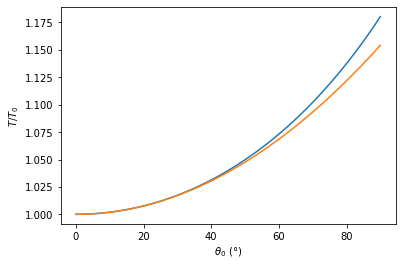

In [31]:
theta = np.linspace(0,np.pi/2,50)
T = []
for thet in theta:
    T.append(period_integral(thet))
T = np.array(T)

plt.plot(theta*180/np.pi, T/T0)
plt.plot(theta*180/np.pi, period_borda_2(theta, length=1)/T0)
plt.xlabel(r"$\theta_0\ (\degree)$")
plt.ylabel(r"$T/T_0$")

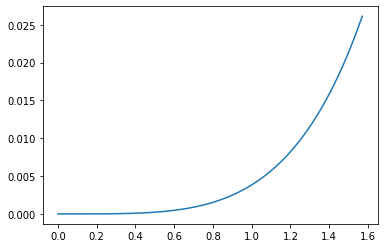

In [32]:
T_integral = T/T0
T_borda    = period_borda_2(theta, length=1)/T0
plt.plot(theta*180/np.pi, T_integral-T_borda)
